In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# create dict with data
data_dict = {'all stores':[.16, .09, .20, .11, .17, .13, .14],
            'our location':[.0935, .132, .3415, .1290, .10, .064, .14]}

# create dataframe
df = pd.DataFrame(data_dict, index = ['apparel','home goods', 'grocery', 'cosmetics',
                                      'electronics', 'Seasonal', 'toys/hobbies']).T

# pass column names to list variable
cols = df.columns.to_list()

# reverse list order in place
cols.reverse()

# reindex dataframe using the reverse order
df = df.reindex(cols, axis = 1)


In [216]:
#data frame
df

,toys/hobbies,Seasonal,electronics,cosmetics,grocery,home goods,apparel
all stores,0.1400,0.1300,0.1700,0.1100,0.2000,0.0900,0.1600
our location,0.1400,0.0640,0.1000,0.1290,0.3415,0.1320,0.0935


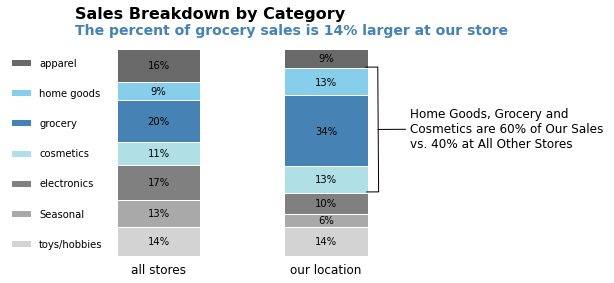

In [298]:
# dictionary to map column name to colors
color_dict = {'toys/hobbies':'lightgray', 'Seasonal':'darkgray', 
              'electronics':'grey', 'cosmetics':'powderblue',
              'grocery':'steelblue','home goods':'skyblue', 'apparel':'dimgray'}

# create figure and axees
fig, ax = plt.subplots()

# plot stacked bar chart
df.plot.bar(stacked = True, edgecolor = 'white', # add white around bars
            rot = 0, color = color_dict,
           ax = ax)

# add title
ax.set_title('Sales Breakdown by Category', loc = 'left', pad = 20, size = 16, weight = 'bold')


# reverse order of legend handles and labels
h,l = ax.get_legend_handles_labels()
labels = l.copy()
labels.reverse()

handles = h.copy()
handles.reverse()

# displays legend
ax.legend(handles, labels,  bbox_to_anchor = (0.11,.95), 
          labelspacing = 2.01, frameon = False) # increases spaces between labels to align with bars


# removes y-axis and tick marks from x-axis
ax.yaxis.set_visible(False)
ax.tick_params(bottom = False, labelsize = 12)

# removes all spines from 
for s in ax.spines:
    ax.spines[s].set_visible(False)

# annotates amounts on bars
for p in ax.patches:
    x = p.get_x()
    y = p.get_y()
    height = p.get_height()
    width = p.get_width()
    
    ax.annotate(f'{height:0.0%}',xy= (x+width/2,y+height/2), ha = 'center', va = 'center')
    
    
# adds annotation to right bar    
ax.annotate('Home Goods, Grocery and \nCosmetics are 60% of Our Sales \nvs. 40% at All Other Stores', 
            xy = (1.3, .61), xytext = (1,.5), textcoords = 'axes fraction', size = 12,
            arrowprops = dict(arrowstyle='-[, widthB=5.2, lengthB=1.0', lw=1))    


# adds subtitle to chart
ax.annotate(f'The percent of grocery sales is 14% larger at our store', color = 'steelblue', size = 14, weight = 'bold',
            xy = (0, 1), xytext = (0, 1.02), textcoords = 'axes fraction')


